In [5]:
# paste install script here
import os
os.environ['PATH'] += ':/home/oslab/Luminescent/bin'

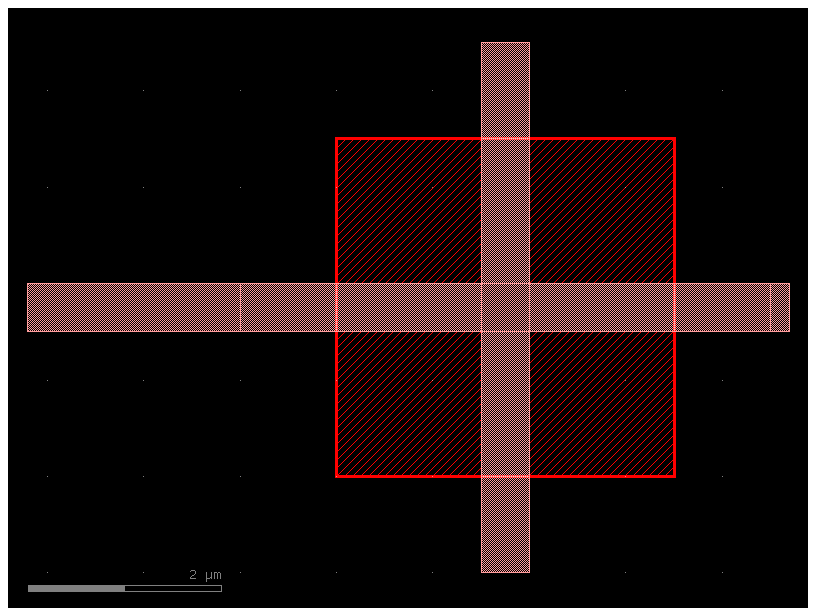

In [6]:
import os
import luminescent as lumi
from luminescent import CLAD, WG ,DESIGN
import gdsfactory as gf
from gdsfactory.technology import LogicalLayer, LayerLevel, LayerStack

path = os.path.join("runs", "cross")
l = w = 3.5
width_wg = 0.5
source_port_margin = 2
margin = 0.2
xmargin_mode = 0.6
c = gf.Component()
dut = c << lumi.mimo(
    l,
    w,
    west=1,
    north=1,
    east=1,
    south=1,
    width_wg=width_wg,
    io=[(1, 3), (2, 4)],
)
ext1 = c << gf.components.straight(margin + source_port_margin)
ext3 = c << gf.components.straight(margin)

ext1.connect("o2", dut.ports["o1"])
ext3.connect("o1", dut.ports["o3"])

import os
import luminescent as lumi
from luminescent import CLAD, WG, DESIGN
import gdsfactory as gf
from gdsfactory.technology import LogicalLayer, LayerLevel, LayerStack

# 参数设置
path = os.path.join("runs", "cross")
l = w = 3.5
width_wg = 0.5
source_port_margin = 2
margin = 0.2
xmargin_mode = 0.6
ymargin_mode = 0.6  # 新增定义

# 创建组件
c = gf.Component()
dut = c << lumi.mimo(
    l,
    w,
    west=1,  # o1
    north=1, # o2
    east=1,  # o3
    south=1, # o4
    width_wg=width_wg,
    io=[(1, 3), (2, 4)],  # o1-o3 和 o2-o4 是两对端口
)

# 添加扩展波导
ext1 = c << gf.components.straight(margin + source_port_margin)
ext3 = c << gf.components.straight(margin)
ext1.connect("o2", dut.ports["o1"])  # o1 输入
ext3.connect("o1", dut.ports["o3"])  # o3 输出

# 添加所有 4 个端口
for i in [1, 2, 3, 4]:
    if f"o{i}" in dut.ports:
        c.add_port(f"o{i}", port=dut.ports[f"o{i}"])

# 添加 CLAD 层边界
c << gf.components.bbox(component=c, layer=CLAD)


c.plot()
c.show()

xmargin_mode: [0.6, 0.6]
using simulation folder runs/cross
loading problem from /home/oslab/Luminescent.jl/runs/cross

running Luminescent julia backend
λ = F(center_wavelength) = 1.55f0
setting up simulation...
meshing geometry - can take few minutes...
13.667252 seconds (10.57 M allocations: 810.630 MiB, 13.31% gc time, 74.32% compilation time)
making sources...
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
making monitors...
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
solving modal profile...
2d
making designs...
----------------------------------------

simulation setup complete

backend: CPU
float: Float32

original size: (90, 64)
padded size: (118, 94)
cell count: 11,092

step size:

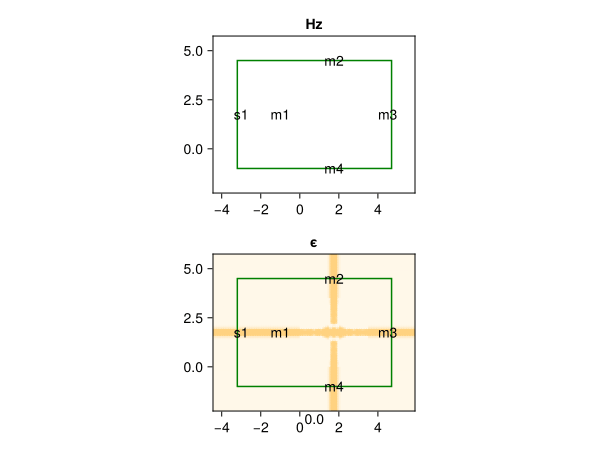

In [7]:
thickness = 0.22
layer_stack = LayerStack(
    layers={
        "design": LayerLevel(
            layer=LogicalLayer(layer=DESIGN),
            thickness=thickness,
            zmin=0.0,
            material="design",
            mesh_order=0,
        ),
        "core": LayerLevel(
            layer=LogicalLayer(layer=WG),
            thickness=thickness,
            zmin=0.0,
            material="Si",
            mesh_order=1,
        ),
        "clad": LayerLevel(
            layer=LogicalLayer(layer=CLAD),
            thickness=10,
            zmin=-5,
            material="SiO2",
            mesh_order=2,
        ),
    }
)


targets = [
    lumi.Target("o3@0,o1@0", 1.0, weight=1 / 3, wavelength=wl)
    for wl in [1.5, 1.55, 1.6]
]+[
    lumi.Target("o2@0,o1@0", 0, weight=1 / 3, wavelength=wl)
    for wl in [1.5, 1.55, 1.6]
] +[
    lumi.Target("o4@0,o1@0", 0, weight=1 / 3, wavelength=wl)
    for wl in [1.5, 1.55, 1.6]
]

lumi.make_prob(
    path,
    c,
    #
    approx_2D_mode="TE",
    source_port_margin=source_port_margin,
    xmargin_mode=xmargin_mode,
    #
    materials=lumi.MATERIALS,
    symmetries=["x", "y"],#y xiangduiyubodaoduichen
    layer_stack=layer_stack,
    #
    nres=5,
    #
    targets=targets,
    lmin=0.2,
    fill_material="Si",
    void_material="SiO2",
    init_holes=False,
    stoploss=0.05,
    iters=50,
    #
    force=True,
)
lumi.solve(path)

lumi.make_movie(path)
